# Introdução

Este notebook foi criado para armazenar as informações mais importantes do curso

##### Projeto Call 911
Este projeto foi baseado em um dataframe do kaggle onde os operadores registravam as ligações de emergência para o 911

##### importes básicos

In [6]:
import numpy as np
import pandas as pd

##### matplot lib para funcionar no jupter

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [8]:
df = pd.read_csv('911.csv')

In [7]:
df.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1



Analisando a coluna title vemos três valores em destaque

In [10]:
df['title'].value_counts().head()

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
Name: title, dtype: int64

#### Função Lambda

Olhando a estrutura do dataframe na coluna title ver-se a possibilidade de subdividir a coluna em mais termos visto que antes dos dois pontos existe 3 variações ("EMS", "Fire" e "Traffic"). Para tanto se faz necessário aplicar uma função split na coluna interira. Tal aplicação é possivel utilizando a função apply do pandas em conjunto com a função lambda.

In [9]:
df['oneTitle'] = df['title'].apply(lambda title: title.split(':')[0])

In [15]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,oneTitle
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


A coluna timeStamp informa a cronologia do dataframe. Se faz necessário transforma-la em informação de tempo para manitupa-la

In [16]:
type(df["timeStamp"][0])

str

In [ ]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

Com a conversão para datetime é possivel extrair vários 

In [20]:
type(df["timeStamp"][0])

pandas._libs.tslibs.timestamps.Timestamp

### Vamos criar uma nova coluna apenas com a data 



In [5]:
df["date"] = df["timeStamp"].apply(lambda x:x.date())

NameError: name 'df' is not defined

com isso se torna mais fácil vizualizar os dados

<AxesSubplot:xlabel='date'>

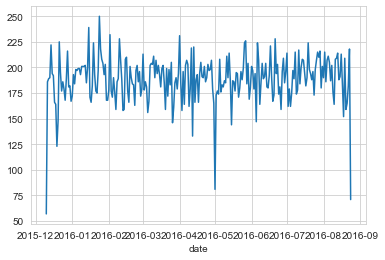

In [26]:
df[df["oneTitle"] == "EMS"].groupby("date").count()["twp"].plot()   

# função groupby

criando algumas colunas com informações cronológicas utilizando  datetime

In [4]:
df["Hour"] = df["timeStamp"].apply(lambda x:x.hour)
df["Month"] = df["timeStamp"].apply(lambda x:x.month)
df["Day of Week"] = df["timeStamp"].apply(lambda x:x.dayofweek)


NameError: name 'df' is not defined

In [30]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,oneTitle,date,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10,17,12,3
